**Use of PCA in Face Recognition**

In [1]:
%matplotlib inline
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import math
from sklearn import svm, datasets
import pylab as pl
from IPython.display import Image
from time import gmtime, strftime
import cv2, os

In [2]:
BASE_DIR = 'data/eigenfaces_data/'
CELEB_DIR = BASE_DIR + 'CelebrityDatabase/'
STUDENT_DIR = BASE_DIR + 'StudentDatabase/'

In [33]:
def show(image):
    # Figure size in inches
    plt.figure(figsize=(2, 2))
    # Show image, with nearest neighbour interpolation
    plt.imshow(image, cmap = plt.cm.gray)# interpolation='nearest')
    
def show_mask(mask):
    plt.figure(figsize=(10, 10))
    plt.imshow(mask, cmap=plt.cm.gray)
    

In [4]:
# flatten mask
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

mask = rgb2gray(scipy.io.loadmat(BASE_DIR + 'mask.mat')['mask'])
rows, cols = np.nonzero(mask)
rows.shape

(17317,)

In [5]:
# flattened image
img = cv2.imread('data/eigenfaces_data/CelebrityDatabase/Adam Baldwin.jpg',0).flatten()

In [6]:
img.shape

(92400,)

In [11]:
# 
summed = np.zeros(rows.shape)
summed.shape

(17317,)

In [12]:

def helperEachImg(filename):
    ret = np.array(rgb2gray(cv2.imread(filename)))[rows,cols]
    global summed # global variable can be referenced like this
    summed += ret
    return ret
# each line is a celebrity face (with masked pixels)
gamma = np.array([helperEachImg(CELEB_DIR + f) for f in os.listdir(CELEB_DIR) if f.endswith(".jpg")])
gamma.shape


(158, 17317)

In [13]:
averaged = summed * 1.0/(gamma.shape[0])
averaged.shape

(17317,)

In [14]:
# subtract mean face (to get how each face differs by)
phi = gamma - averaged
phi.shape

(158, 17317)

In [15]:
# N^2 x M 
A = phi.T
# A.T is phi


Avoid having AxA.T will have a N^2xN^2<br>
A.TxA instead to have MxM

In [16]:
gamma[1]

array([ 13.2295,   9.746 ,   9.387 , ...,   5.3738,  13.373 ,  12.3731])

In [19]:
# calc covariance mtx
temp = A.T.dot(A)

In [20]:
temp.shape

(158, 158)

In [25]:
eig = A.dot(np.linalg.eig(temp)[1]).T
eig.shape

(158, 17317)

(10, 330, 280)


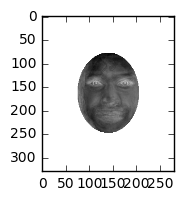

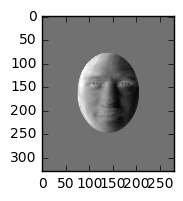

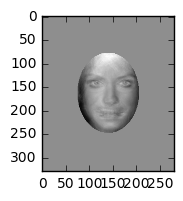

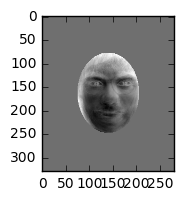

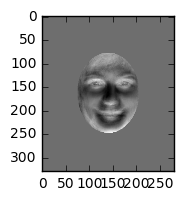

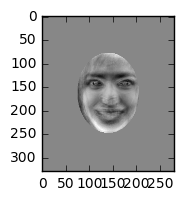

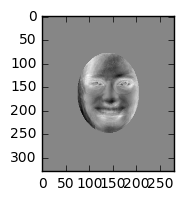

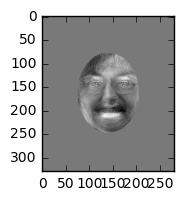

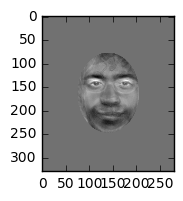

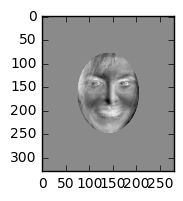

In [44]:
# 10 largest eigenfaces
K = 10
K_vec = np.zeros((K, mask.shape[0], mask.shape[1]))
print(K_vec.shape)


for i in range(K):
    temp = eig[i]
    cur_K = K_vec[i]
    for j in range(len(rows)):
        cur_K[rows[j]][cols[j]] = temp[j]
    show(cur_K)

In [ ]:
mask.shape

In [ ]:
np.nonzero(mask)

In [ ]:
eig[1].shape

Reference: http://www.vision.jhu.edu/teaching/vision08/Handouts/case_study_pca1.pdf <nt>
http://www.face-rec.org/algorithms/pca/jcn.pdf <br>